## imports and Load Monthly Partitions (Data Lake View)

In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

files = sorted(glob.glob("../data/nyc_taxi/yellow_tripdata_*.csv"))

dfs = []
for f in files:
    month = f.split("_")[-1].replace(".csv", "")
    df_m = pd.read_csv(f)
    df_m["partition"] = month
    dfs.append(df_m)

df = pd.concat(dfs, ignore_index=True)

print("Total rows:", len(df))
df.head()


Total rows: 47248845


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,partition,RatecodeID
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1.0,N,-73.974785,...,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,2015-01,NaN
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1.0,N,-73.994415,...,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,2015-01,NaN
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1.0,N,-73.951820,...,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2015-01,NaN
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1.0,N,-74.004326,...,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2015-01,NaN
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1.0,N,-74.004181,...,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2015-01,NaN


## Basic Schema Inspection

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47248845 entries, 0 to 47248844
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             float64
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
 19  partition              object 
 20  RatecodeID             float64
dtypes: float64(14), int64(3), object(4)
memory usage: 7.

## Key Feature Selection

In [3]:
numeric_cols = [
    "trip_distance",
    "fare_amount",
    "total_amount",
    "passenger_count"
]

df[numeric_cols].describe()


,trip_distance,fare_amount,total_amount,passenger_count
count,4.724884e+07,4.724884e+07,4.724884e+07,4.724884e+07
mean,7.508418e+00,1.239219e+01,1.559273e+01,1.667040e+00
std,6.487658e+03,7.861770e+01,5.801393e+02,1.322092e+00
min,-3.390584e+06,-9.576000e+02,-9.584000e+02,0.000000e+00
25%,1.000000e+00,6.500000e+00,8.300000e+00,1.000000e+00
50%,1.690000e+00,9.000000e+00,1.160000e+01,1.000000e+00
75%,3.090000e+00,1.400000e+01,1.715000e+01,2.000000e+00
max,1.907263e+07,4.294967e+05,3.950612e+06,9.000000e+00


## Distribution by Partition

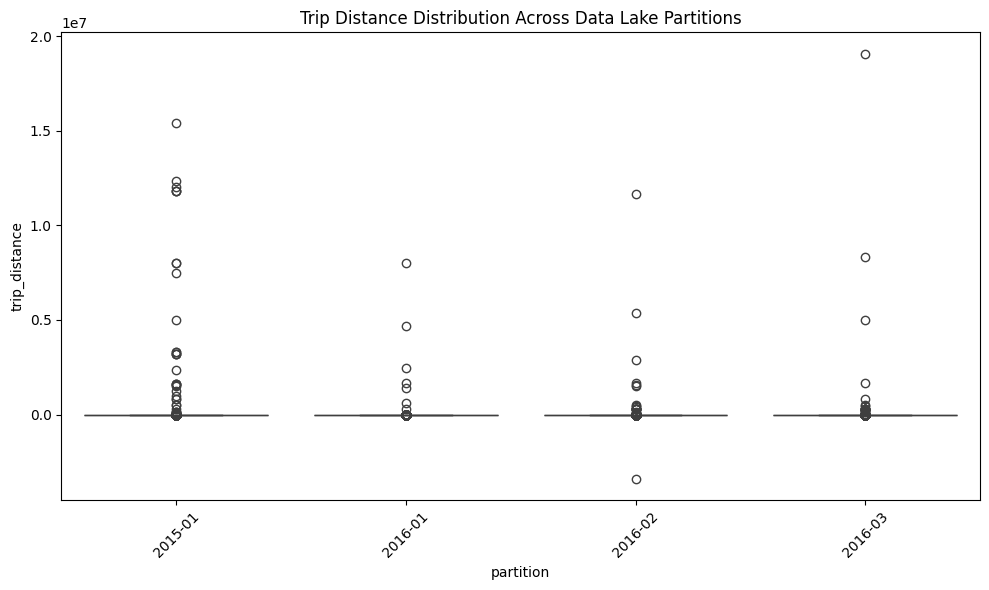

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="partition",
    y="trip_distance"
)
plt.xticks(rotation=45)
plt.title("Trip Distance Distribution Across Data Lake Partitions")
plt.tight_layout()
plt.show()


## Fare Amount Evolution

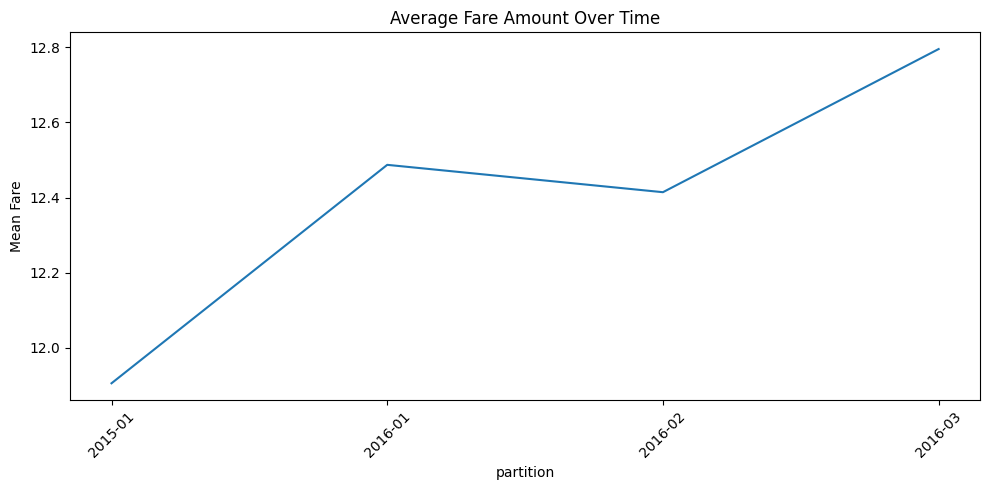

In [5]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df,
    x="partition",
    y="fare_amount",
    estimator="mean",
    errorbar=None
)
plt.xticks(rotation=45)
plt.title("Average Fare Amount Over Time")
plt.ylabel("Mean Fare")
plt.tight_layout()
plt.show()


## Save Summary Table

In [6]:
summary = (
    df.groupby("partition")[numeric_cols]
    .mean()
    .reset_index()
)

summary.to_csv("../results/tables/nyc_partition_summary.csv", index=False)
summary


,partition,trip_distance,fare_amount,total_amount,passenger_count
0,2015-01,13.459130,11.905659,15.108295,1.681491
1,2016-01,4.648197,12.486929,15.641395,1.670847
2,2016-02,5.060763,12.414134,15.602635,1.655208
3,2016-03,6.131770,12.795078,16.045820,1.659580
